# Task 3: Network Statistics Analysis

This notebook extracts statistical data from the expanded London Underground network created in Task 2:
- Total length of the transport network
- Average distance between stations
- Standard deviation of distances between stations

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Recreate the expanded network from Task 2
G = nx.Graph()

# Define all stations
stations = [
    # Piccadilly Line
    'Hyde Park Corner', 'Green Park', 'Piccadilly Circus', 'Leicester Square', 'Covent Garden', 'Holborn',
    # Central Line
    'Bond Street', 'Oxford Circus', 'Tottenham Court Road', 'Chancery Lane', 'Bank', 'Liverpool Street',
    # Northern Line
    'Warren Street', 'Goodge Street', 'Embankment', 'Waterloo', 'London Bridge', 'Borough',
    # Circle Line
    'Paddington', 'Edgware Road', 'Baker Street', 'King\'s Cross', 'Moorgate', 'Tower Hill'
]

G.add_nodes_from(stations)

# Define edges with distances (in km) and line information
# Piccadilly Line (blue)
piccadilly_edges = [
    ('Hyde Park Corner', 'Green Park', 0.8, 'Piccadilly'),
    ('Green Park', 'Piccadilly Circus', 0.6, 'Piccadilly'),
    ('Piccadilly Circus', 'Leicester Square', 0.3, 'Piccadilly'),
    ('Leicester Square', 'Covent Garden', 0.4, 'Piccadilly'),
    ('Covent Garden', 'Holborn', 0.5, 'Piccadilly')
]

# Central Line (red)
central_edges = [
    ('Bond Street', 'Oxford Circus', 0.4, 'Central'),
    ('Oxford Circus', 'Tottenham Court Road', 0.5, 'Central'),
    ('Tottenham Court Road', 'Holborn', 0.6, 'Central'),
    ('Holborn', 'Chancery Lane', 0.4, 'Central'),
    ('Chancery Lane', 'Bank', 0.7, 'Central'),
    ('Bank', 'Liverpool Street', 0.5, 'Central')
]

# Northern Line (black)
northern_edges = [
    ('Warren Street', 'Goodge Street', 0.4, 'Northern'),
    ('Goodge Street', 'Tottenham Court Road', 0.3, 'Northern'),
    ('Tottenham Court Road', 'Leicester Square', 0.4, 'Northern'),
    ('Leicester Square', 'Embankment', 0.5, 'Northern'),
    ('Embankment', 'Waterloo', 0.6, 'Northern'),
    ('Waterloo', 'London Bridge', 1.0, 'Northern'),
    ('London Bridge', 'Borough', 0.4, 'Northern')
]

# Circle Line (yellow)
circle_edges = [
    ('Paddington', 'Edgware Road', 0.8, 'Circle'),
    ('Edgware Road', 'Baker Street', 0.7, 'Circle'),
    ('Baker Street', 'King\'s Cross', 1.2, 'Circle'),
    ('King\'s Cross', 'Moorgate', 0.9, 'Circle'),
    ('Moorgate', 'Liverpool Street', 0.5, 'Circle'),
    ('Liverpool Street', 'Tower Hill', 1.1, 'Circle')
]

# Combine all edges
all_edges = piccadilly_edges + central_edges + northern_edges + circle_edges

# Add edges to graph
for edge in all_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], line=edge[3])

print("Network recreated successfully!")
print(f"Total stations: {G.number_of_nodes()}")
print(f"Total connections: {G.number_of_edges()}")

Network recreated successfully!
Total stations: 24
Total connections: 24


In [3]:
# Extract all distances from the network
distances = []
edge_details = []

for u, v, data in G.edges(data=True):
    distance = data['weight']
    line = data['line']
    distances.append(distance)
    edge_details.append({
        'Station_A': u,
        'Station_B': v,
        'Distance_km': distance,
        'Line': line
    })

# Create DataFrame for better analysis
df_edges = pd.DataFrame(edge_details)
print("Edge Details:")
print(df_edges.head(10))

Edge Details:
           Station_A             Station_B  Distance_km        Line
0   Hyde Park Corner            Green Park          0.8  Piccadilly
1         Green Park     Piccadilly Circus          0.6  Piccadilly
2  Piccadilly Circus      Leicester Square          0.3  Piccadilly
3   Leicester Square         Covent Garden          0.4  Piccadilly
4   Leicester Square  Tottenham Court Road          0.4    Northern
5   Leicester Square            Embankment          0.5    Northern
6      Covent Garden               Holborn          0.5  Piccadilly
7            Holborn  Tottenham Court Road          0.6     Central
8            Holborn         Chancery Lane          0.4     Central
9        Bond Street         Oxford Circus          0.4     Central


In [4]:
# Calculate network statistics

# 1. Total length of the transport network
total_length = sum(distances)

# 2. Average distance between stations
average_distance = np.mean(distances)

# 3. Standard deviation of distances
std_deviation = np.std(distances, ddof=1)  # Using sample standard deviation

print("=" * 50)
print("NETWORK STATISTICS ANALYSIS")
print("=" * 50)
print(f"Total length of transport network: {total_length:.2f} km")
print(f"Average distance between stations: {average_distance:.3f} km")
print(f"Standard deviation of distances: {std_deviation:.3f} km")
print("=" * 50)

NETWORK STATISTICS ANALYSIS
Total length of transport network: 14.50 km
Average distance between stations: 0.604 km
Standard deviation of distances: 0.249 km


In [5]:
# Additional statistical analysis
print("\nADDITIONAL STATISTICS:")
print(f"Number of connections: {len(distances)}")
print(f"Minimum distance: {min(distances):.1f} km")
print(f"Maximum distance: {max(distances):.1f} km")
print(f"Median distance: {np.median(distances):.3f} km")

# Statistics by line
print("\nSTATISTICS BY LINE:")
line_stats = df_edges.groupby('Line')['Distance_km'].agg([
    'count', 'sum', 'mean', 'std', 'min', 'max'
]).round(3)
line_stats.columns = ['Connections', 'Total_Length_km', 'Avg_Distance_km', 'Std_Dev_km', 'Min_km', 'Max_km']
print(line_stats)


ADDITIONAL STATISTICS:
Number of connections: 24
Minimum distance: 0.3 km
Maximum distance: 1.2 km
Median distance: 0.500 km

STATISTICS BY LINE:
            Connections  Total_Length_km  Avg_Distance_km  Std_Dev_km  Min_km  \
Line                                                                            
Central               6              3.1            0.517       0.117     0.4   
Circle                6              5.2            0.867       0.258     0.5   
Northern              7              3.6            0.514       0.234     0.3   
Piccadilly            5              2.6            0.520       0.192     0.3   

            Max_km  
Line                
Central        0.7  
Circle         1.2  
Northern       1.0  
Piccadilly     0.8  


C:\Users\quanb\AppData\Local\Temp\ipykernel_20752\511355711.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(line_distances, labels=df_edges['Line'].unique())


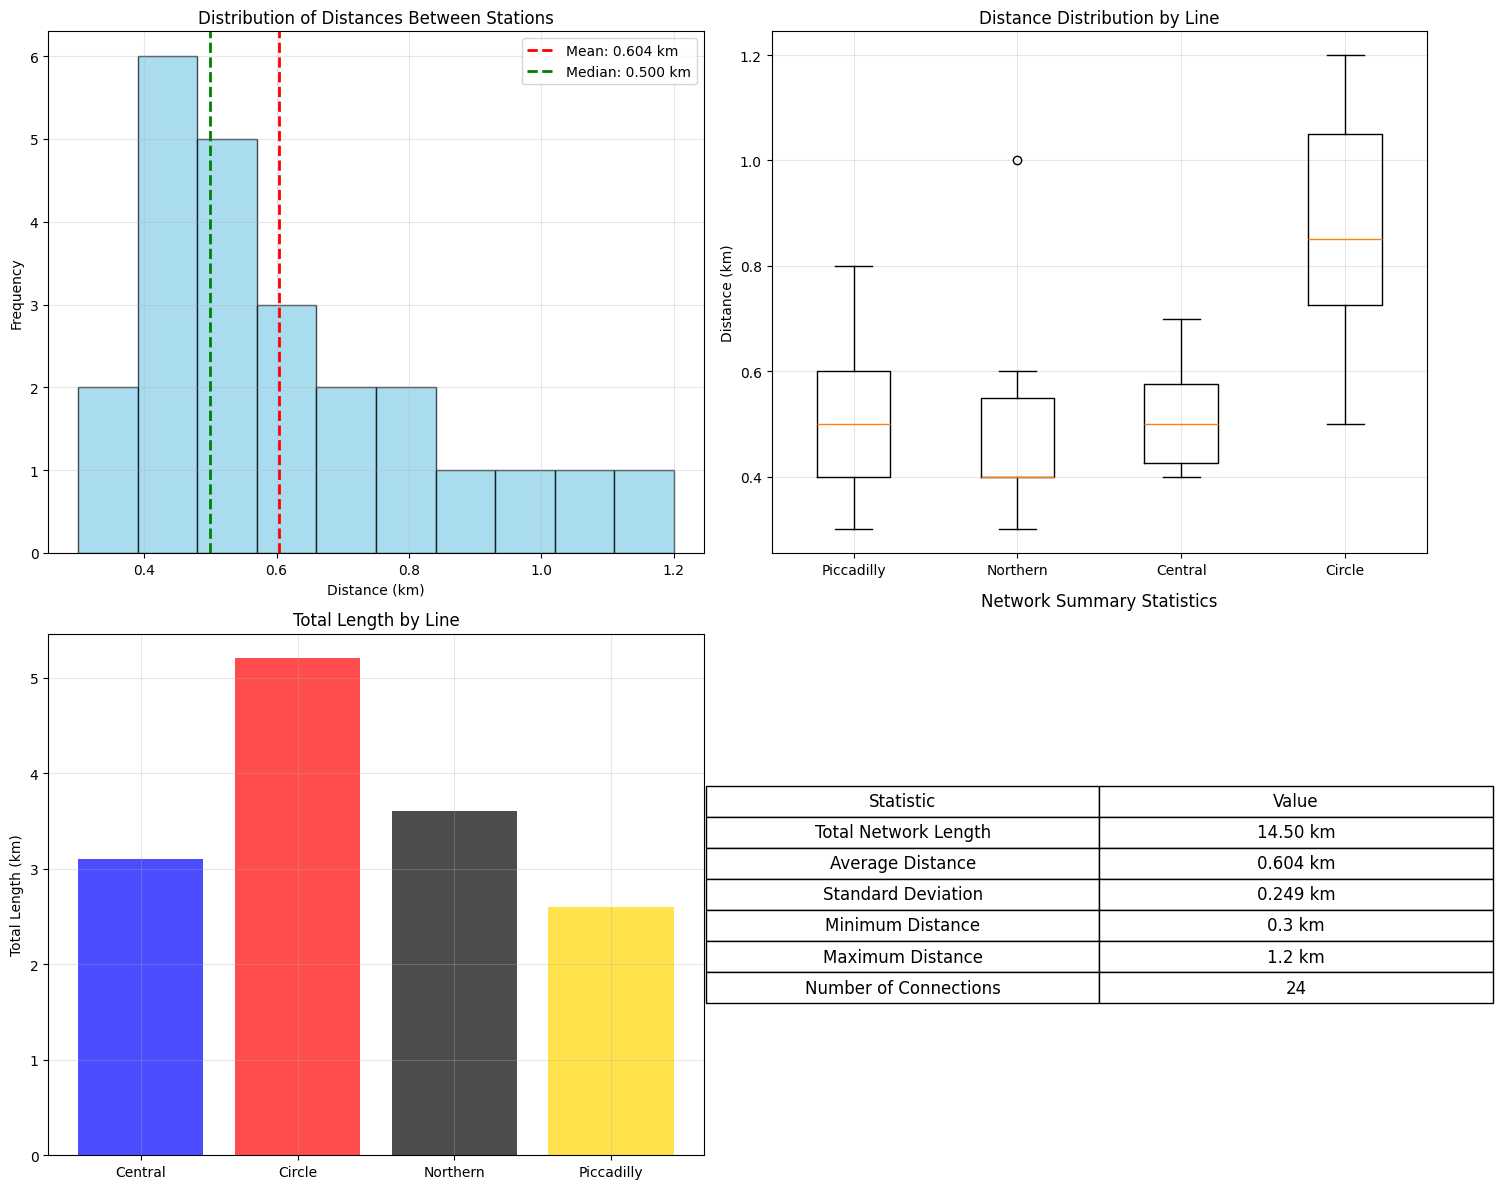

In [6]:
# Create visualizations of the statistics
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogram of distances
ax1.hist(distances, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(average_distance, color='red', linestyle='--', linewidth=2, label=f'Mean: {average_distance:.3f} km')
ax1.axvline(np.median(distances), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(distances):.3f} km')
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Distances Between Stations')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Box plot of distances by line
line_distances = [df_edges[df_edges['Line'] == line]['Distance_km'].values for line in df_edges['Line'].unique()]
ax2.boxplot(line_distances, labels=df_edges['Line'].unique())
ax2.set_ylabel('Distance (km)')
ax2.set_title('Distance Distribution by Line')
ax2.grid(True, alpha=0.3)

# 3. Bar chart of total length by line
line_totals = df_edges.groupby('Line')['Distance_km'].sum()
colors = ['blue', 'red', 'black', 'gold']
ax3.bar(line_totals.index, line_totals.values, color=colors, alpha=0.7)
ax3.set_ylabel('Total Length (km)')
ax3.set_title('Total Length by Line')
ax3.grid(True, alpha=0.3)

# 4. Summary statistics table
ax4.axis('tight')
ax4.axis('off')
summary_data = [
    ['Total Network Length', f'{total_length:.2f} km'],
    ['Average Distance', f'{average_distance:.3f} km'],
    ['Standard Deviation', f'{std_deviation:.3f} km'],
    ['Minimum Distance', f'{min(distances):.1f} km'],
    ['Maximum Distance', f'{max(distances):.1f} km'],
    ['Number of Connections', f'{len(distances)}']
]
table = ax4.table(cellText=summary_data, 
                  colLabels=['Statistic', 'Value'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
ax4.set_title('Network Summary Statistics', pad=20)

plt.tight_layout()
plt.show()

In [7]:
# Export results to CSV for further analysis
df_edges.to_csv('network_edges_analysis.csv', index=False)

# Create summary statistics DataFrame
summary_stats = pd.DataFrame({
    'Statistic': ['Total_Network_Length_km', 'Average_Distance_km', 'Standard_Deviation_km', 
                  'Min_Distance_km', 'Max_Distance_km', 'Number_of_Connections'],
    'Value': [total_length, average_distance, std_deviation, 
              min(distances), max(distances), len(distances)]
})

summary_stats.to_csv('network_summary_statistics.csv', index=False)

print("Analysis complete!")
print("Results exported to:")
print("- network_edges_analysis.csv")
print("- network_summary_statistics.csv")

Analysis complete!
Results exported to:
- network_edges_analysis.csv
- network_summary_statistics.csv
